# Full-FORCE Learning

## Oshri Fatkiev

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage

D = hdf5storage.loadmat('ps5_data.mat')

## Exploring Activity

In [5]:
N_NEURONS = 4
neurons_idxs = np.random.randint(D['N'], size=N_NEURONS)
neurons_idxs

array([183, 297, 163, 492])

### The untrained RNN vs the target activity

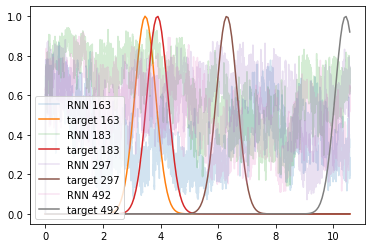

In [14]:
for i in np.sort(neurons_idxs):
    plt.plot(D['t'], D['R0'][i, :], label=r'RNN {}'.format(i), alpha=.2)
    plt.plot(D['target_t'], D['target_activity'][i, :], label=r'target {}'.format(i))
    plt.legend()
plt.show()

### The trained RNN vs the target activity

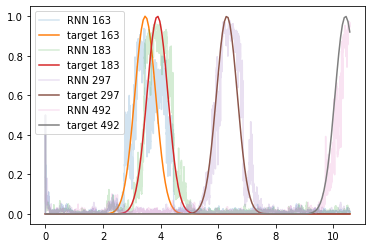

In [12]:
for i in np.sort(neurons_idxs):
    plt.plot(D['t'], D['R'][i, :], label=r'RNN {}'.format(i), alpha=.2)
    plt.plot(D['target_t'], D['target_activity'][i, :], label=r'target {}'.format(i))
    plt.legend()
plt.show()

### Heatmaps of `R0`,`R` and `target_activity`  

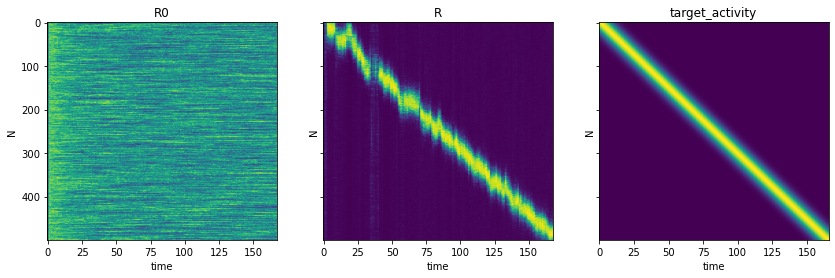

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
step = len(D['t']) // len(D['target_t'])

for i,var in enumerate(['R0', 'R', 'target_activity']):
    if var == 'target_activity':
        ax[i].imshow(D[var], aspect='auto')
    else:
        ax[i].imshow(D[var][:,::step], aspect='auto')
    ax[i].set_title(var)
    ax[i].set_xlabel('time')
    ax[i].set_ylabel('N')

plt.show()

As we can see, we can describe the network activity as a function of time and unit vector as a simple linear function. Therefore, the neural activity seem to encode time, as we each time step determines which neuron(s) will be activated.  The initial (untrained) RNN looks quite random and does not fits the target activity well. However. in the case of the trained RNN, the network activity looks a lot more similar to the target.

## PCA Analysis of The Dynamics

Since the activity of a recurrrent neural network defines a trajectory in an N-dimensional space, let us apply dimensionality reduction to visualize it in 2 and 3 dimensions. We choose to work with the first 50 principle components by setting `N_COMP = 50`.

In [5]:
from sklearn.decomposition import PCA
N_COMP = 50

###  Projecting each data matrix into its PC space

First, let us create the PCAs of all the data matrices.

In [56]:
PCAs = np.zeros(3, dtype=object)
PROJs = np.zeros(3, dtype=object)
CEVRs = np.zeros(3, dtype=object)

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    PCAs[i] = PCA(n_components=N_COMP).fit(D[var].T)
    PROJs[i] = PCAs[i].transform(D[var].T).T
    CEVRs[i] = PCAs[i].explained_variance_ratio_.cumsum()

Now, we can create the projections of the trajectories in 2D, by taking the first two rows from each object in `PROJs` - the initial point marked in red, and the terminal point in black

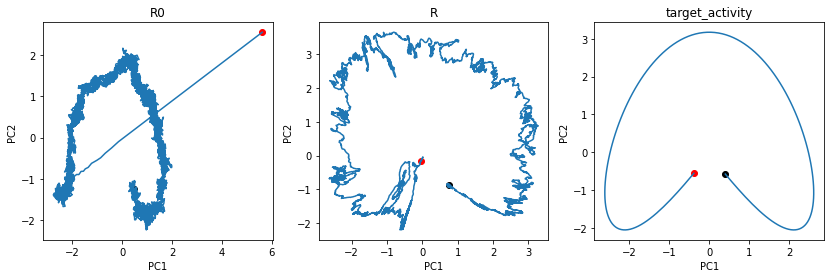

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    ax[i].plot(PROJs[i][0, :], PROJs[i][1, :])
    ax[i].scatter(PROJs[i][0, 0], PROJs[i][1, 0], c="red")
    ax[i].scatter(PROJs[i][0, -1], PROJs[i][1, -1], c="black")
    ax[i].set_title(var)
    ax[i].set_xlabel('PC1')
    ax[i].set_ylabel('PC2')
    
plt.show()

Similarly, we can project the 3D trajectories by taking the first 3 rows.

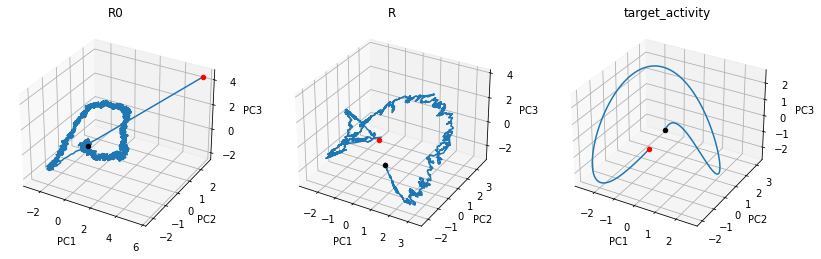

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={"projection": "3d"})

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    ax[i].plot(PROJs[i][0, :], PROJs[i][1, :], PROJs[i][2, :])
    ax[i].scatter(PROJs[i][0, 0], PROJs[i][1, 0], PROJs[i][2, 0], c="red")
    ax[i].scatter(PROJs[i][0, -1], PROJs[i][1, -1], PROJs[i][2, -1], c="black")
    ax[i].set_title(var)
    ax[i].set_xlabel('PC1')
    ax[i].set_ylabel('PC2')
    ax[i].set_zlabel('PC3')

plt.show()

As we can see, both the trained RNN and the untraind one trajectories looks somewhat similar to the traget activity's one, although the trained one does look more similar to the target. 

Plotting the cumulative explained variance as a function of the number of PCs from 0 to 50 we get:

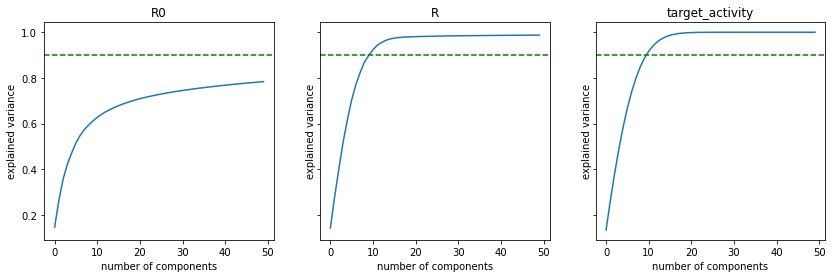

In [146]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    ax[i].plot(CEVRs[i])
    ax[i].set_title(var)
    ax[i].axhline(y=0.9, ls='dashed', c='g')
    ax[i].set_xlabel('number of components')
    ax[i].set_ylabel('explained variance')

plt.show()

We see that for the untraind RNN we can't capture 90% of the variance in the data, as with all the 50 PCs we are able to capture < 80% only; For both the trained RNN and the target activity we only need around 10 PCs to capture 90% of the variance. 

### Projecting all data matrices onto the trained RNN's PC space

To better see the effect of training, let's project the untrained RNN `R0` and the target activity `target_activity` onto `R`'s PC space

In [51]:
R_PROJs = np.zeros(3, dtype=object)

for i,var in enumerate(['R0', 'R', 'target_activity']):
    R_PROJs[i] = PCAs[2].transform(D[var].T).T

Once again, plotting the 2/3 dimensions trajectory we obtain

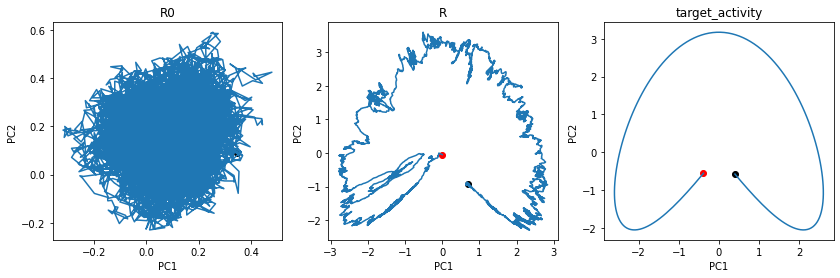

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    ax[i].plot(R_PROJs[i][0, :], R_PROJs[i][1, :])
    ax[i].scatter(R_PROJs[i][0, 0], R_PROJs[i][1, 0], c="red")
    ax[i].scatter(R_PROJs[i][0, -1], R_PROJs[i][1, -1], c="black")
    ax[i].set_title(var)
    ax[i].set_xlabel('PC1')
    ax[i].set_ylabel('PC2')

plt.show()

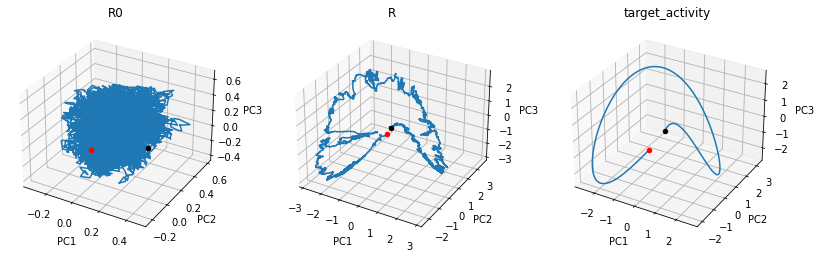

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={"projection": "3d"})

for i,var in enumerate(['R0', 'R', 'target_activity']):   
    ax[i].plot(R_PROJs[i][0, :], R_PROJs[i][1, :], R_PROJs[i][2, :])
    ax[i].scatter(R_PROJs[i][0, 0], R_PROJs[i][1, 0], R_PROJs[i][2, 0], c="red")
    ax[i].scatter(R_PROJs[i][0, -1], R_PROJs[i][1, -1], R_PROJs[i][2, -1], c="black")
    ax[i].set_title(var)
    ax[i].set_xlabel('PC1')
    ax[i].set_ylabel('PC2')
    ax[i].set_zlabel('PC3')

plt.show()

In this case, we can see more clearly the difference between the traind and the untraind RNNs. While in their own PC space all of the data matrices looks similar, in the case where we project all of them to the trained RNN PC space we get that the untrained RNN looks like a complete mess while the trained RNN and the target activity looks similar to each other **in the same PC space**, as the trained network indeed has learned to mimic the target activity.

## Exploring Connectivity

To learn how the training changed the recurrent interactions, let us compare the overall magnitude of the change, i.e. the norm of the difference between the untrained random matrix `R0` and the trained matrix that was inferred from the neural data, `R`.

In [57]:
np.linalg.norm(D['R']-D['R0'])

1169.7511121848954

In order to quantify this effect, we compare the norm we got to the norm of the difference between any other two random matrices with the same size and variance as `R0`

In [64]:
mean = 0
var = D['g']
size = D['R0'].shape

A = np.random.normal(loc=mean, scale=var, size=size)
B = np.random.normal(loc=mean, scale=var, size=size)

np.linalg.norm(A-B)

4881.141151376293

We see, that the network does not change much comparing to the difference between these two random matrices. 

Next, let us produce histograms of the entries in the trained RNN and of the elements in the untrained RNN, using log-scale for the y-axis.

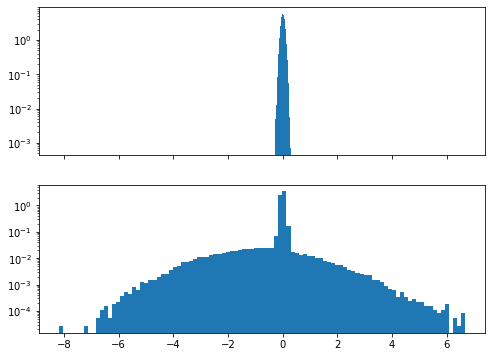

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
N_BINS = 100

for i,var in enumerate(['J0', 'J']):
    ax[i].hist(D[var].flatten(), bins=N_BINS, log=True, density=True)
    
plt.show()

As we can see, before the training the distribution of weights cantered around zero with a relatively small variance, whereas after the training the distribution changed - it looks like the trainind added small weights around the original distribution.

To get a better look at the disribution after the training, let us plot the connectivity matrices as heatmaps.

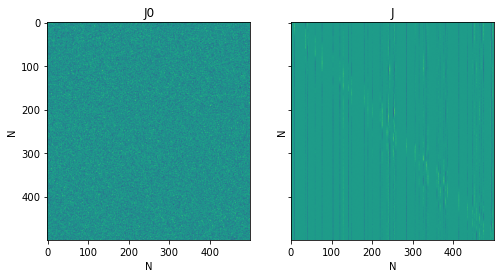

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

for i,var in enumerate(['J0','J']):
    ax[i].imshow(D[var], aspect='auto')
    ax[i].set_title(var)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('N')

plt.show()

It looks like some units are more trained than others, as we can see a weak diagonal line in the `J` heatmap, i.e. some neurons learned to give hugh weight to the connection with themselves.

The *trained units* of the units can be defined by

$$MS\left(J_{ij}\right)=\frac{1}{N}\sum_{i=1}^{N}J_{ij}^2>0.5$$

Let's produce a heatmap of the retained columns only

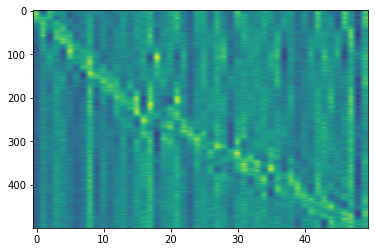

In [70]:
rows, cols = D['J'].shape

idxs = []
for col in range(cols):
    if np.sum(D['J'][:, col] ** 2)/cols > .5:
        idxs.append(col)

plt.imshow(D['J'][:, idxs], aspect='auto')
plt.show()

We see that the trained weights of this untis look we only needed to train around 50 neurons to get the desired activity. It seems that each neuron of those 50 excites itself and as a result inhibits it surroundings, so ultimately we get that moving bump, as each of the trained neurons get a little bit of excitation and then amplifies it until we get to the next trained neuron and so on.